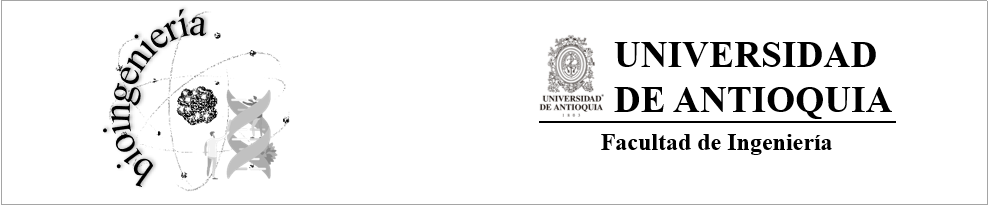

Fuente: https://python-hl7.readthedocs.io/en/latest/api.html

HL7 Soup : https://www.hl7soup.com/

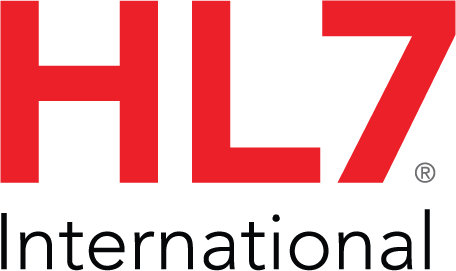

$HL7$ (Health Level Seven) es un conjunto de <u>estándares</u> para facilitar el intercambio electrónico de información clínica; que utiliza una notación formal del lenguaje unificado de modelado (Unified Modeling Language, UML) y un metalenguaje extensible de marcado con etiquetas (Extensible Markup Language, XML).

# python-hl7 - Easy HL7 v2.x Parsing

* $python-hl7$ es una librería sencilla para analizar mensajes de Health Level 7 (HL7) versión 2.x en objetos Python
* Incluye un cliente simple que puede enviar mensajes HL7 a un servidor de Protocolo de Nivel Mínimo Inferior (MLLP - Minimal Lower Level Protocol).

## Hacer la inslatación de la API

In [5]:
!pip install hl7

## HL7 es un objeto en Python

In [ ]:
# Se hace la importación de la librería
import hl7

In [ ]:
hl7.NULL = ''

In [ ]:
help(hl7.parse)

## Ejemplo de Mensaje

In [ ]:
message = 'MSH|^~\&|GHH LAB|ELAB-3|GHH OE|BLDG4|200202150930||ORU^R01|CNTRL-3456|P|2.4\n\r'
message += 'PID|||555-44-4444||EVERYWOMAN^EVE^E^^^^L|JONES|196203520|F|||153 FERNWOOD DR.^^STATESVILLE^OH^35292||(206)3345232|(206)752-121||||AC555444444||67-A4335^OH^20030520\n\r'
message += 'OBR|1|845439^GHH OE|1045813^GHH LAB|1554-5^GLUCOSE|||200202150730||||||||555-55-5555^PRIMARY^PATRICIA P^^^^MD^^LEVEL SEVEN HEALTHCARE, INC.|||||||||F||||||444-44-4444^HIPPOCRATES^HOWARD H^^^^MD\n\r'
message += 'OBX|1|SN|1554-5^GLUCOSE^POST 12H CFST:MCNC:PT:SER/PLAS:QN||^182|mg/dl|70_105|H|||F\n\r'
print(message)

In [ ]:
message[13:16]

In [ ]:
message.split('|')[2].split(' ')[1]

In [ ]:
import hl7
h = hl7.parse(message)

In [ ]:
type(h)

In [ ]:
str(h) == message

In [ ]:
isinstance(h, list)

In [ ]:
help(isinstance)

In [ ]:
isinstance(1., float)

## Árbol de resultados
Los mensajes HL7 tienen un número limitado de niveles. El nivel superior es un Mensaje. Un mensaje se compone de una serie de campos (hl7.Field). Los campos pueden repetirse (hl7.Repetition). El contenido de un campo es un tipo de datos primitivo (como una cadena) o un tipo de datos compuesto compuesto por uno o más componentes (hl7.Component). Los componentes, a su vez, se componen de subcomponentes (tipos de datos primitivos).

Se accede al resultado del análisis como un árbol usando las convenciones de la lista de Python:
## $Message[segment][field][repetition][component][sub-component]$

También se puede acceder al resultado utilizando las convenciones de indexación basadas en HL7, tratando cada elemento como invocable:

## $Message(segment)(field)(repetition)(component)(sub-component)$

### Sepuede hallar la longitud de la lista

In [ ]:
len(h)

Se puede extraer el $hl7.Segment$ desde la instancia $hl7.Message$:

In [ ]:
h[0]

In [ ]:
h[1]

In [ ]:
h[2]

In [ ]:
h[3]

In [ ]:
print(message)

Como son listas, se pueden seguir usando la indexación para acceder a los campos requeridos

In [ ]:
h[3][0]

In [ ]:
h[3][1]

In [ ]:
h[3][2]

In [ ]:
h[3][3]

También usando la nomenclatura de los objetos HL7

In [ ]:
h(4)(2)

Se pueden convertir los elementos en cadenas ($str$) de python

In [ ]:
type(h[3])

In [ ]:
str(h[3])

... Pero OJO!!!... Se deben manejar diferentes al objeto Nativo.

In [ ]:
h[3]

Se puede acceder al nivel más interno de la lista

In [ ]:
h[3][3][0][1][0]

In [ ]:
h[3][3]

In [ ]:
h(4)(3)

Recordemos que la nomenclatura entre los objetos $Lista$ y $HL7$ manejan la indexación diferente

In [ ]:
h[3][3][0][1][0] is h(4)(3)(1)(2)(1)

In [ ]:
h(4)(3)(1)(2)(1)

In [ ]:
h[3][5][0][1][0]

Se puede acceder a los Segmentos ($hl7.Segment$) del mensaje usando la siguiente sintaxis

_Nota: hay una pequeña diferencia en cuanto a la indexación si se usa esta forma_

In [ ]:
h.segments('OBX')

In [ ]:
h.segments('MSH')

Usando nomenclatura de objetos $HL7$

In [ ]:
h.segments('OBX')[0][3][0][1][0]

Usando nomenclatura de objetos $Lista$

In [ ]:
h['OBX'][0][3][0][1][0]

In [ ]:
h['OBX'][0][3][0][1][0] is h['OBX'](1)(3)(1)(2)(1)

In [ ]:
h.segment('PID')[3][0]

In [ ]:
h.extract_field('OBX')